<h2>Contexte du projet</h2>
À partir d’un exemple de données collectées par cette entreprise (https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish) , votre mission en tant que jeune freelance est dans un premier temps de comprendre ce jeu de données : comment est-il organisé ? Y-a-t-il des données manquantes ? Est-il exploitable pour analyse en l’état ?
Cela dans le but de mettre en place une base de données adaptée ainsi que la procédure d’import de ces données en base.
La deuxième phase de travail sera orientée vers l'analyse de ce jeu de données

Votre mission est la suivante :
<p>* collecter le jeu de données</p>
<p>* faire une première analyse des données: nombre de colonnes, valeurs manquantes, cohérence des unités avec les valeurs..</p>
<p>* concevoir la base de données</p>
<p>* programmer l’import des données</p>
<p>* faire une analyse exploratoire des données, faire une analyse de corrélation des variables.</p>
<p>* proposer un programme d’intelligence artificielle adapté aux données disponibles (clustering de produit, prédictions, analyse de commentaires..)</p>
<p>* rédiger une documentation synthétique sur l’usage de la base de données (connexion, récupération des données, etc.) ainsi que votre programme IA.</p>

<h3>1. Libraries</h3>

In [240]:


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import math


<h3>2. Load data </h3>

In [241]:
df = pd.read_csv(r'summer-products-with-rating-and-performance_2020-08.csv')
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [242]:
df.shape

(1573, 43)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [244]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [245]:
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(df)

title :  1201
title_orig :  1203
price :  127
retail_price :  104
currency_buyer :  1
units_sold :  15
uses_ad_boosts :  2
rating :  192
rating_count :  761
rating_five_count :  605
rating_four_count :  440
rating_three_count :  384
rating_two_count :  262
rating_one_count :  330
badges_count :  4
badge_local_product :  2
badge_product_quality :  2
badge_fast_shipping :  2
tags :  1230
product_color :  101
product_variation_size_id :  106
product_variation_inventory :  48
shipping_option_name :  15
shipping_option_price :  8
shipping_is_express :  2
countries_shipped_to :  94
inventory_total :  10
has_urgency_banner :  1
urgency_text :  2
origin_country :  6
merchant_title :  958
merchant_name :  957
merchant_info_subtitle :  1058
merchant_rating_count :  917
merchant_rating :  952
merchant_id :  958
merchant_has_profile_picture :  2
merchant_profile_picture :  125
product_url :  1341
product_picture :  1341
product_id :  1341
theme :  1
crawl_month :  1


In [246]:
round(df.describe(include=np.number).T)

,count,mean,std,min,25%,50%,75%,max
price,1573.0,8.0,4.0,1.0,6.0,8.0,11.0,49.0
retail_price,1573.0,23.0,30.0,1.0,7.0,10.0,26.0,252.0
units_sold,1573.0,4339.0,9357.0,1.0,100.0,1000.0,5000.0,100000.0
uses_ad_boosts,1573.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
rating,1573.0,4.0,1.0,1.0,4.0,4.0,4.0,5.0
rating_count,1573.0,890.0,1984.0,0.0,24.0,150.0,855.0,20744.0
rating_five_count,1528.0,442.0,980.0,0.0,12.0,79.0,414.0,11548.0
rating_four_count,1528.0,180.0,401.0,0.0,5.0,32.0,168.0,4152.0
rating_three_count,1528.0,135.0,312.0,0.0,4.0,24.0,129.0,3658.0
rating_two_count,1528.0,64.0,151.0,0.0,2.0,11.0,62.0,2003.0


 <h3>3. Data Cleaning </h3>

In [247]:
df.duplicated().any()

True

In [248]:
df.duplicated().sum()

34

<h3>3.1 Analyse dublons </h3>

In [249]:
from scipy import stats

In [250]:
stats.ttest_ind(df[df.duplicated() == True]['units_sold'], df[df.duplicated() == False]['units_sold'])

Ttest_indResult(statistic=-2.3841411928634155, pvalue=0.01723714436449663)

In [251]:
df[df.duplicated() == True]['units_sold'].mean()

560.5294117647059

In [252]:
df[df.duplicated() == False]['units_sold'].mean()

4422.480181936322

La raison pour laquelle il y a des doublons dans les données peut être qu'ils ont d'abord été mis en évidence, puis qu'ils sont apparus une deuxième fois à la suite de la recherche. Donc, on peut penser que ces produits pourraient être "populaires" que les autres et se vendent plus. Cependant, les résultats du test t ont montré qu'il n'y avait pas de différence significative entre les produits non mis en évidence(populaires) et ceux mis en évidence.

On regarde la colonne price, retail_price et shipping_is_express pour expliquer les doublons

Peut-être parce que que les produits mis en évidence sont nettement plus chers que les autres produits. 

In [253]:
stats.ttest_ind(df[df.duplicated() == True]['price'], df[df.duplicated() == False]['price'])

Ttest_indResult(statistic=-2.111496596004406, pvalue=0.03488720856509743)

In [254]:
stats.ttest_ind(df[df.duplicated() == True]['retail_price'], df[df.duplicated() == False]['retail_price'])

Ttest_indResult(statistic=-0.25015478183951656, pvalue=0.8025003601347656)

In [255]:
stats.ttest_ind(df[df.duplicated() == True]['shipping_is_express'], df[df.duplicated() == False]['shipping_is_express'])

Ttest_indResult(statistic=-0.2974671383146946, pvalue=0.7661492220674688)

Cependant, il n'y a pas de telles preuves pour cela. Des doublons peuvent se produire pour des raisons techniques plutôt que promotionnelles ou les consommateurs peuvent ne pas prêter attention aux produits mis en évidence.

In [256]:
df = df.drop_duplicates()
df.shape

(1539, 43)

In [257]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [258]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data.head(20)

,Total Missing,Percent
merchant_profile_picture,1314,85.380117
has_urgency_banner,1071,69.590643
urgency_text,1071,69.590643
rating_two_count,43,2.794022
rating_five_count,43,2.794022
rating_four_count,43,2.794022
rating_three_count,43,2.794022
rating_one_count,43,2.794022
product_color,41,2.664068
origin_country,16,1.039636


In [259]:

df[df['merchant_name'].isnull()].index.tolist()

[408, 1103, 1350]

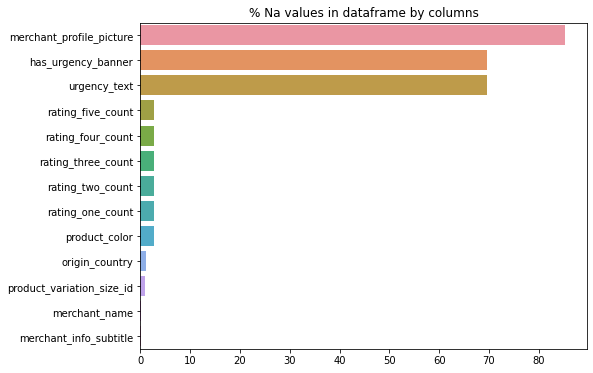

In [260]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns')
plot_missing_data(df)

In [261]:
df[df['urgency_text'].isnull()== False]['urgency_text'].unique()

array(['Quantité limitée !', 'Réduction sur les achats en gros'],
      dtype=object)

In [262]:
df[(df['has_urgency_banner'].isnull()== False)]['has_urgency_banner']

0       1.0
1       1.0
2       1.0
4       1.0
8       1.0
       ... 
1558    1.0
1561    1.0
1564    1.0
1565    1.0
1569    1.0
Name: has_urgency_banner, Length: 468, dtype: float64

In [263]:
df[(df['has_urgency_banner'].isnull()== False)]['has_urgency_banner'].unique()

array([1.])

Nous avons vu que toutes les valeurs non nulles sont 1. Il est donc possible que les produits sans bannière d'urgence soient étiquetés comme NaN. Si tel est le cas, nous pouvons peut-être trouver une différence entre les éléments avec bannière d'urgence et les autres.

In [264]:
stats.ttest_ind(df[df['has_urgency_banner'] == 1.0]['units_sold'], df[df['has_urgency_banner'] != 1.0]['units_sold'] )

Ttest_indResult(statistic=-1.1085893506514295, pvalue=0.2677808101454223)

Comme le test t l'a indiqué, il n'y a pas de différence significative entre les produits avec bannière d'urgence et le produit sans bannière d'urgence spécifiée. Des recherches supplémentaires doivent être effectuées pour étudier l'influence de la bannière d'urgence

In [265]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [266]:
df[df['product_variation_size_id'].isnull()].index.tolist()

[44, 116, 338, 404, 584, 637, 726, 856, 954, 1179, 1296, 1385, 1440, 1474]

In [267]:
df[df['origin_country'].isnull()].index.tolist()

[56,
 180,
 498,
 507,
 547,
 632,
 679,
 802,
 921,
 943,
 1059,
 1147,
 1244,
 1256,
 1289,
 1296]

In [268]:
df[df['merchant_name'].isnull()].index.tolist()

[408, 1103, 1350]

In [269]:
df[df['merchant_info_subtitle'].isnull()].index.tolist()

[438]

In [270]:
df[df['rating_five_count'].isnull()].index.tolist() == df[df['rating_four_count'].isnull()].index.tolist()

True

In [271]:
df[df['rating_four_count'].isnull()].index.tolist() == df[df['rating_three_count'].isnull()].index.tolist()

True

In [272]:
df[df['rating_three_count'].isnull()].index.tolist() == df[df['rating_two_count'].isnull()].index.tolist()

True

In [273]:
df[df['rating_two_count'].isnull()].index.tolist() == df[df['rating_one_count'].isnull()].index.tolist()

True

In [274]:
#df.dropna(inplace=True) apres ça shape = (1427, 40)
df.shape

(1539, 43)

In [275]:

#Ajouter une colonne pour le nombre total d'annonces du même marchand
df['num_listings'] = df['merchant_title'].apply(lambda x: df['merchant_title'].value_counts()[str(x)])


In [276]:
#Changer NaN merchant_name to 'no_merchant_name'
df['merchant_name'] = df['merchant_name'].apply(lambda x: 'no_merchant_name' if not isinstance(x, str) else x)


In [277]:
# Nan merchant_info_subtitle
df['merchant_info_subtitle'] = df['merchant_info_subtitle'].apply(lambda x: 'no_merchant_info_subtitle' if not isinstance(x, str) else x)

In [278]:
#Remplacez NaN dans has_urgency_banner par 0
df['has_urgency_banner'] = df['has_urgency_banner'].apply(lambda x: 1 if x == 1 else 0)


In [279]:
#Créer une liste des  tags
df['tag_list'] = df['tags'].apply(lambda x: x.split(','))

In [280]:
#Changer NaN rating counts to 0
df['rating_five_count'] = df['rating_five_count'].apply(lambda x: 0 if math.isnan(x) else x)
df['rating_four_count'] = df['rating_four_count'].apply(lambda x: 0 if math.isnan(x) else x)
df['rating_three_count'] = df['rating_four_count'].apply(lambda x: 0 if math.isnan(x) else x)
df['rating_two_count'] = df['rating_two_count'].apply(lambda x: 0 if math.isnan(x) else x)
df['rating_one_count'] = df['rating_one_count'].apply(lambda x: 0 if math.isnan(x) else x)



In [281]:
#Changer NaN product colors to 'no_color'
df['product_color'] = df['product_color'].apply(lambda x: 'no_color' if not isinstance(x, str) else x)



In [282]:
#Changer NaN sizes to 'no_size'
df['product_variation_size_id'] = df['product_variation_size_id'].apply(lambda x: 'no_size' if not isinstance(x, str) else x)



In [283]:
#Changer NaN origin countries to 'no_origin_country'
df['origin_country'] = df['origin_country'].apply(lambda x: 'no_origin_country' if not isinstance(x, str) else x)


In [284]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data.head(20)

,Total Missing,Percent
merchant_profile_picture,1314,85.380117
urgency_text,1071,69.590643
title,0,0.000000
merchant_rating_count,0,0.000000
countries_shipped_to,0,0.000000
inventory_total,0,0.000000
has_urgency_banner,0,0.000000
origin_country,0,0.000000
merchant_title,0,0.000000
merchant_name,0,0.000000


In [285]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'num_listings', 'tag_list'],
      dtype='object')

In [286]:

#Supprimer les variables redondantes/inutiles
del df['shipping_option_name']
#del df['title']
del df['currency_buyer']
del df['urgency_text']
#del df['merchant_name']
del df['merchant_profile_picture']
#del df['merchant_id']
#del df['merchant_info_subtitle']
#del df['product_url']
#del df['product_picture']
#del df['product_id']
del df['theme']
del df['crawl_month']

#Output cleaned data to new csv
df_out = df
df_out.shape



(1539, 39)

In [ ]:
#Output cleaned data to new csv
df_out.to_csv('wish_data_cleaned.csv',index = False)